In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [7]:
df2 = pd.read_csv("../prices.txt", sep='\\s+', header=None, index_col=None)
# df2 = df2.iloc[:1000]

In [8]:
df = pd.read_csv("../prices.txt", sep='\\s+', header=None, index_col=None)
train_df = df.iloc[:750]
test_df = df.iloc[250:]

In [9]:
(df).prod(1).diff().autocorr()

0.4138794532547866

In [10]:
# high autocorr


In [11]:
for i in range(50):
    comb = (df[i] + df.sum(1)).diff().autocorr()
    if comb > 0.2:
        print(i, comb)

0 0.4160350234709383
1 0.4076360344021013
2 0.37838361348314653
3 0.39948562590788866
4 0.40588047023251483
5 0.41400435509208716
6 0.40582970461089946
7 0.39950157345426907
8 0.4065288108828813
9 0.3787579024441548
10 0.4067406898463707
11 0.38970368122711246
12 0.41592104982438194
13 0.4199209015748976
14 0.39336964679269204
15 0.4148538279259976
16 0.41042279416747013
17 0.4215654380280482
18 0.40533540582025046
19 0.41385997668512337
20 0.41690631443387993
21 0.4200457362783458
22 0.3592790767252887
23 0.39063076563292637
24 0.4123407090464205
25 0.41316568277074783
26 0.4002412433450608
27 0.41977127105166145
28 0.37825350956013537
29 0.4096848393883308
30 0.40648827628424256
31 0.4076737564177504
32 0.4042598931424758
33 0.4151543543025606
34 0.4155337141892413
35 0.4148929297844649
36 0.4075384216257603
37 0.40486265326956966
38 0.4258473448094508
39 0.42297072483798864
40 0.3966092926434934
41 0.4145036113573489
42 0.40745553476516977
43 0.40297763984596724
44 0.419922214509253

In [12]:
df.sum(1).pct_change()

0           NaN
1      0.001693
2     -0.000067
3      0.000688
4      0.001735
         ...   
995    0.000392
996    0.000198
997    0.000392
998   -0.000427
999   -0.000084
Length: 1000, dtype: float64

<Axes: >

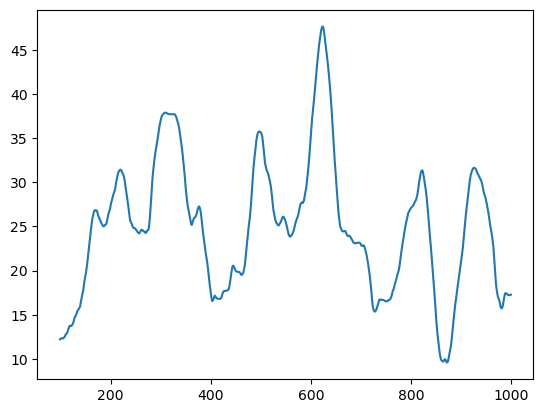

In [13]:
df.sum(1).rolling(100).std().plot()

In [14]:
autocorrs = []
train_df = df.iloc[:750]
for i in range(50):
    total = list(range(50))
    total.remove(i)
    autocorrs.append((train_df)[i].diff().autocorr())

new_df = pd.DataFrame({'autocorrs': autocorrs}, index=list(range(50)))
new_df.sort_values(by='autocorrs')

,autocorrs
16,-0.081294
9,-0.060848
27,-0.045936
42,-0.040860
0,-0.039451
12,-0.034173
43,-0.028445
3,-0.025624
5,-0.018142
31,-0.016589


In [ ]:
# import itertools

# for choices in itertools.combinations(range(50), 5):
#     corr = df[list(choices)].sum(1).diff().autocorr()
#     if corr > 0.3:
#         print(choices, corr)

In [16]:
test_df[list(new_df.sort_values(by='autocorrs').index)[-7:]].sum(1).diff().autocorr()
# df[list(new_df.sort_values(by='autocorrs').index)[:20]].sum(1).diff().autocorr(1)

0.1542001955651188

In [17]:
autocorrs = []
for i in range(50):
    total = list(range(50))
    total.remove(i)
    autocorrs.append((df2)[total].sum(1).diff().autocorr())

new_df = pd.DataFrame({'autocorrs': autocorrs}, index=list(range(50)))
new_df.sort_values(by='autocorrs')

,autocorrs
44,0.392362
23,0.392882
46,0.393632
38,0.393917
41,0.394278
39,0.394845
37,0.397020
27,0.397114
17,0.397760
31,0.397763


In [18]:
entries = new_df.sort_values(by='autocorrs').index.values

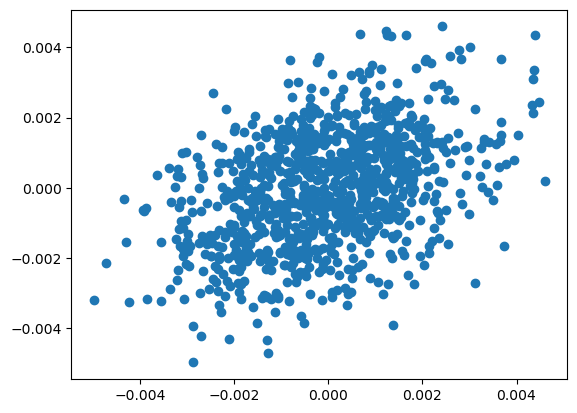

In [19]:
sample = (df2.iloc[:1000])
sample = sample
plt.scatter(sample.sum(1).pct_change(), sample.sum(1).pct_change().shift(1))

In [20]:
window = 50
prices = df.pct_change().dropna().sum(1).values
xs = []
ys = []
for i in range(window, prices.shape[0]):
    xs.append(prices[i-window:i])
    ys.append(prices[i])

xs, ys = np.array(xs), np.array(ys)
xs.shape

(949, 50)

In [21]:
from sklearn.model_selection import train_test_split

train_xs, test_xs, train_ys, test_ys = train_test_split(xs, ys, test_size=0.2, shuffle=False)

In [22]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor

# model = RandomForestRegressor(n_estimators=500, max_depth=10)
# model = DecisionTreeRegressor(max_depth=2)
# model = KNeighborsRegressor(n_neighbors=5)
model = LinearRegression()
# model = SVR(kernel='rbf', C=10)
model.fit(train_xs, train_ys)
model.score(test_xs, test_ys)

0.04881221157615345

In [457]:
# get subset
train_df = df.iloc[:500]
subset = []
while len(subset) < 40:
    current = 0 if len(subset) == 0 else train_df[subset].sum(1).diff().autocorr()
    best = 0
    best_i = 0
    for i in range(50):
        if i in subset:
            continue
        
        score = train_df[subset + [i]].sum(1).diff().autocorr()
        if score > best:
            best_i = i
            best = score
    
    # if best < current:
    #     break
    
    subset += [best_i]

subset


[38,
 21,
 39,
 17,
 5,
 47,
 33,
 45,
 0,
 19,
 13,
 30,
 6,
 12,
 20,
 1,
 35,
 32,
 41,
 25,
 16,
 14,
 44,
 27,
 46,
 23,
 24,
 8,
 28,
 48,
 42,
 18,
 29,
 34,
 15,
 26,
 31,
 36,
 49,
 37]

In [453]:
len(subset)

25

In [463]:
df2.iloc[:500].sum(1).diff().autocorr()



np.float64(0.3041813541146505)

In [ ]:
for i in range

<Axes: xlabel='Lag', ylabel='Autocorrelation'>

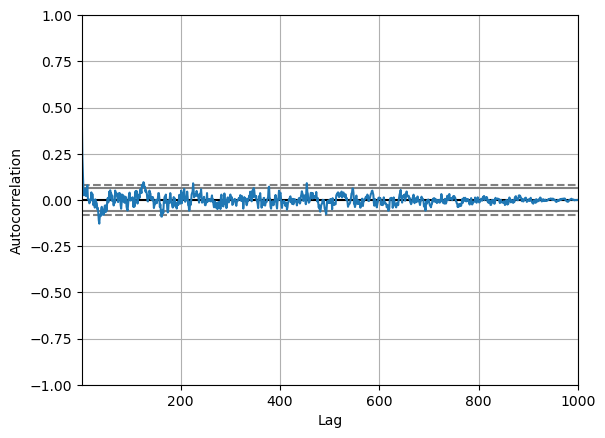

In [476]:
pd.plotting.autocorrelation_plot(df.pct_change().sum(1))

<Axes: >

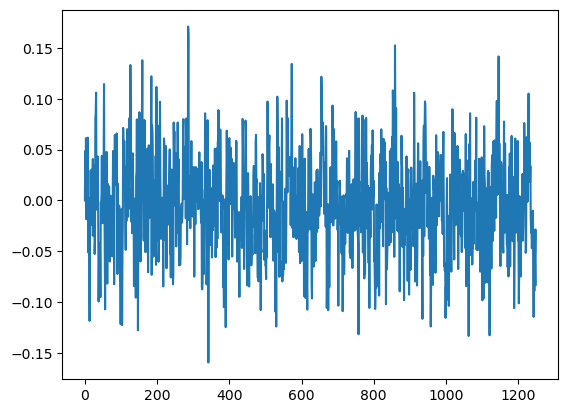

In [246]:
df2.pct_change().sum(1).plot()

<Axes: >

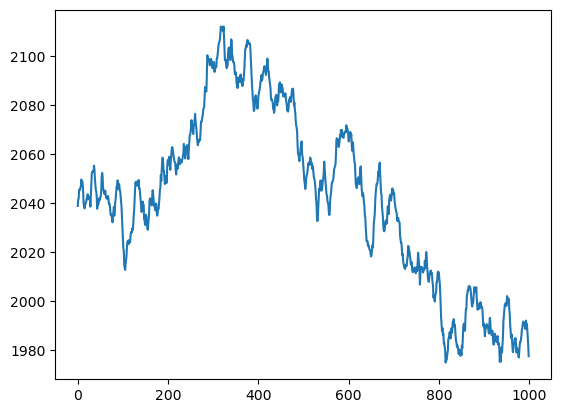

In [119]:
df2.iloc[:1000].sum(1).plot()


<Axes: xlabel='Lag', ylabel='Autocorrelation'>

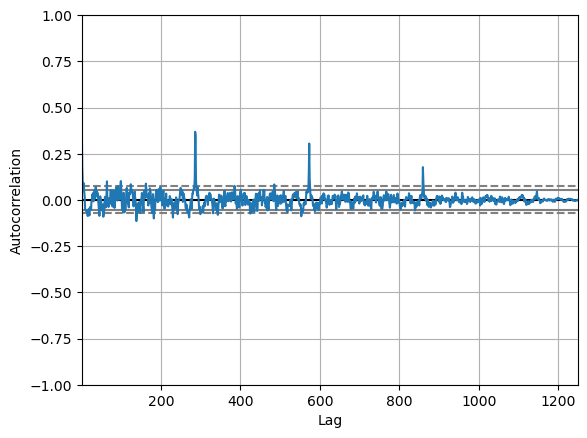

In [241]:
pd.plotting.autocorrelation_plot(np.log(df2).sum(1).diff().dropna())

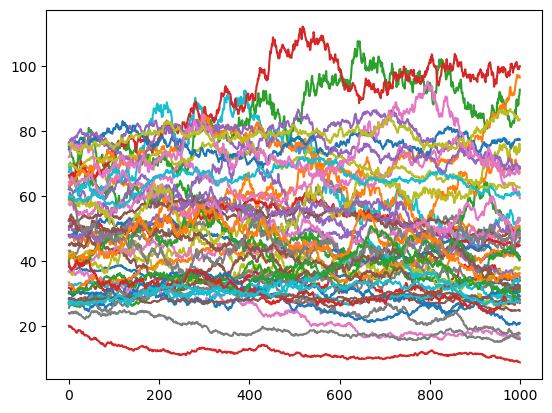

In [207]:
plt.plot(df)

In [223]:
vols = df.pct_change().std()
tickers = pd.DataFrame({'vols': vols}, index=np.arange(50))
tickers.sort_values(by='vols')

/tmp/ipykernel_762468/2144561988.py:1: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  vols = df.pct_change().std()


,vols
38,0.004237
0,0.004478
45,0.004849
20,0.004938
39,0.005148
19,0.005184
15,0.005427
48,0.005459
5,0.005630
24,0.005643


In [257]:
target = list(tickers.sort_values(by='vols').index)
df.iloc[200:].sum(1).pct_change().autocorr()

np.float64(0.43462333213794246)

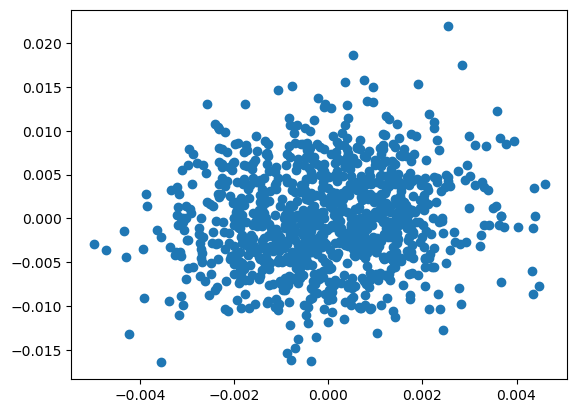

In [220]:
# df.sum(1).pct_change().plot()
# df[0].pct_change().plot()
plt.scatter(df.sum(1).pct_change(), df[5].pct_change())
# plt.scatter(df.sum(1).pct_change(), df2.iloc[:1000].sum(1).pct_change())

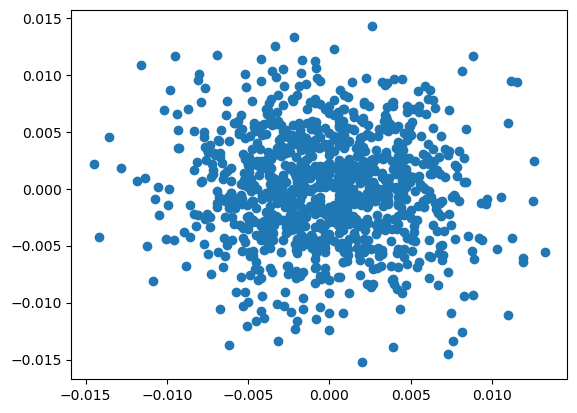

In [179]:
plt.scatter(df[0].pct_change(), df2[49].pct_change())

In [114]:
np.log(df2).sum(1).diff().autocorr()

np.float64(0.3460151629522263)

(300.0, 400.0)

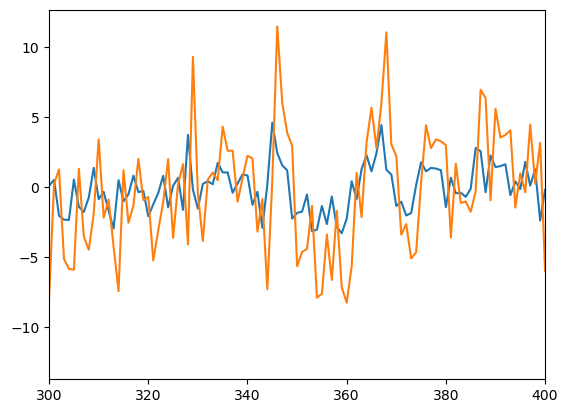

In [70]:
(df.sum(1).diff()*0.4).plot()
(df.sum(1).diff().shift(1)).plot()
plt.xlim([300, 400])